[View in Colaboratory](https://colab.research.google.com/github/divsinha99/Employee_Turnover/blob/master/Employee_turnover.ipynb)

# Part 1: Obtaining the Data

In [0]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving turnover.csv to turnover.csv


In [3]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.DataFrame.from_csv('turnover.csv', index_col=None)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data cleaning

In [4]:
# Check to see if there are any missing values in our data set
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [0]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [5]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Exploratory Data Analysis

Statistical Overview

- About 15,000 employee observations and 10 features
- The company had a turnover rate of about 24%
- Mean satisfaction of employees is 0.61

In [7]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [8]:
# Check the type of our features. 
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [9]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [10]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Correlation Matrix and heatmap

Moderate Positively Correlated Features:

- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours: 0.417211
- averageMonthlyHours vs evaluation: 0.339742

Moderate Negatively Correlated Feature:

- satisfaction vs turnover: -0.388375

**Summary:**

 - From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

 - For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


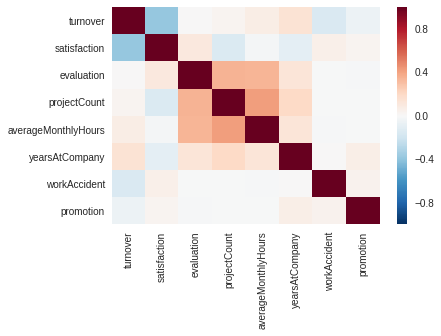

In [12]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

# Statistical Test for Correlation

**One-Sample T-Test (Measuring Satisfaction Level)**
A one-sample t-test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

**Hypothesis Testing:** Is there significant difference in the means of satisfaction level between employees who had a turnover and temployees who had no turnover?

- Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and those who did not..

- Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and those who did not..

In [13]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
#emp_population = df['satisfaction'].mean()
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479524
The mean satisfaction for employees that had a turnover is: 0.4400980117614114


Conducting the T-Test

Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [14]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

###  Result

The test result shows the test statistic "t" is equal to -51.33. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():


if the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can reject the null hypothesis

In [15]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


### One-Sample T-Test Summary

T-Test = -51.33 | P-Value = 0.000_ | Reject Null Hypothesis

Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%


there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 0.00_ at a 5% confidence level is a good indicator to reject the null hypothesis.

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

# Summary Distribution plots

Summary: Let's examine the distribution on some of the employee's features. Here's what I found:

- Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.
- Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
- AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)

The evaluation and average monthly hour graphs both share a similar distribution.
Employees with lower average monthly hours were evaluated less and vice versa.
If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

Text(0,0.5,'Employee Count')

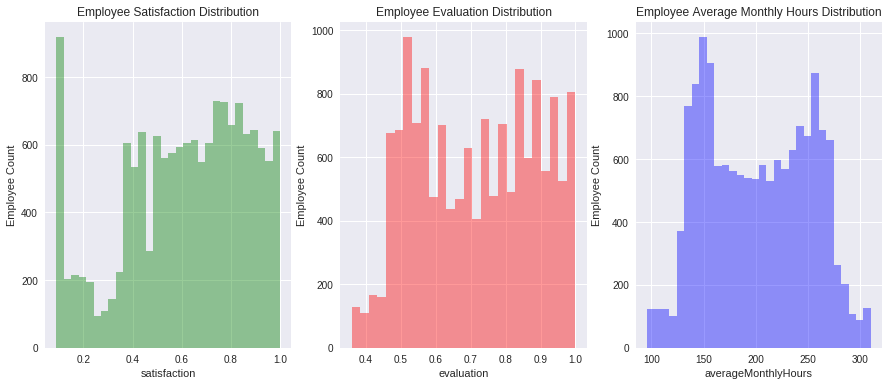

In [16]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

## Salary vs Turnover:

Summary:

Majority of employees who left either had low or medium salary.
Barely any employees left with high salary
Employees with low to average salaries tend to leave the company.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


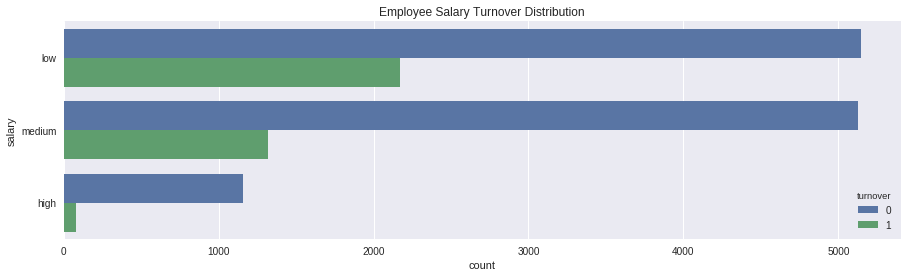

In [17]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

## Department V.S. Turnover

- The sales, technical, and support department were the top 3 departments to have employee turnover
- The management department had the smallest amount of turnover

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

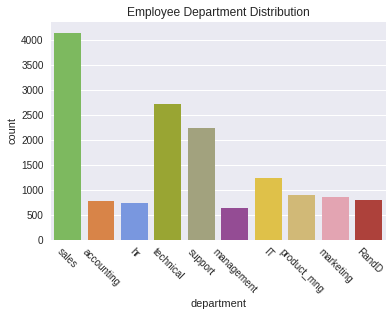

In [18]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


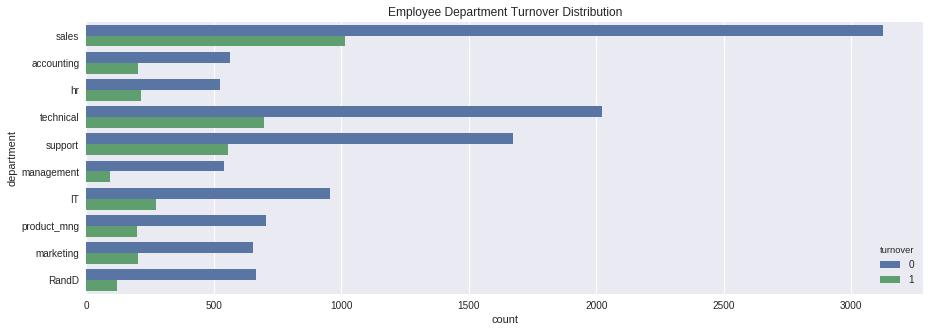

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

## Turnover V.S. ProjectCount

- More than half of the employees with 2,6, and 7 projects left the company
- Majority of the employees who did not leave the company had 3,4, and 5 projects
- All of the employees with 7 projects left the company
- There is an increase in employee turnover rate as project count increases

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0,0.5,'Percent')]

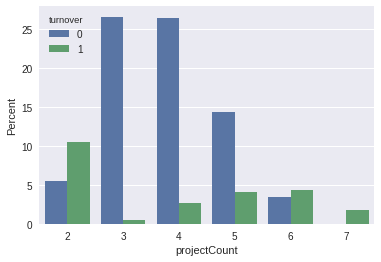

In [20]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## Turnover V.S. Evaluation

- There is a biomodal distribution for those that had a turnover.
- Employees with low performance tend to leave the company more
- Employees with high performance tend to leave the company more
- The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5,1,'Employee Evaluation Distribution - Turnover V.S. No Turnover')

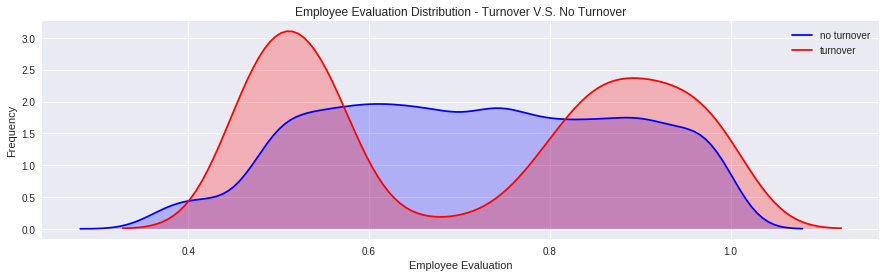

In [21]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

## Turnover V.S. AverageMonthlyHours

- Another bi-modal distribution for employees that turnovered
- Employees who had less hours of work (~150hours or less) left the company more
- Employees who had too many hours of work (~250 or more) left the company
- Employees who left generally were underworked or overworked.

Text(0.5,1,'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

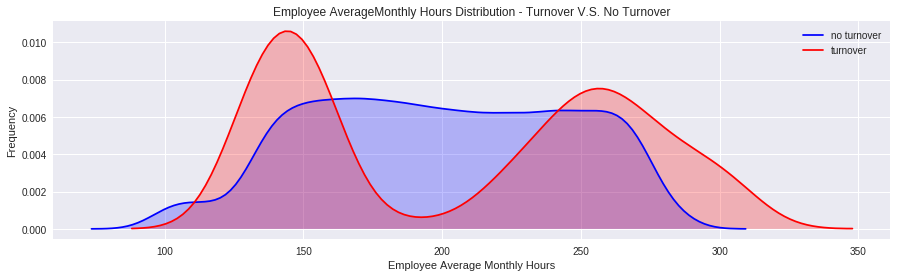

In [22]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

## Turnover V.S. Satisfaction

- There is a tri-modal distribution for employees that turnovered
- Employees who had really low satisfaction levels (0.2 or less) left the company more
- Employees who had low satisfaction levels (0.3~0.5) left the company more
- Employees who had really high satisfaction levels (0.7 or more) left the company more

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

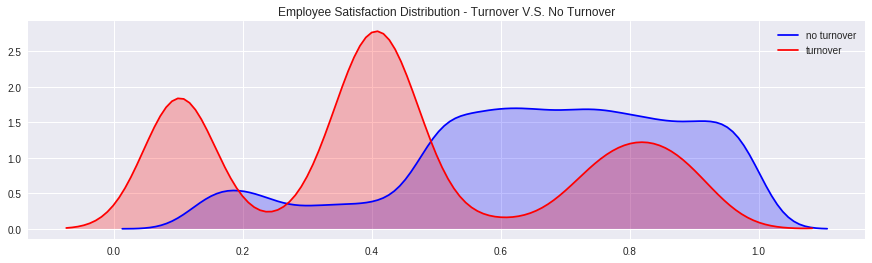

In [23]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

## ProjectCount VS AverageMonthlyHours

- As project count increased, so did average monthly hours
- Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.
- Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects
- In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


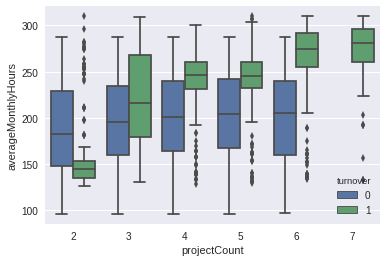

In [24]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

## ProjectCount VS Evaluation

Similar trend as above.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


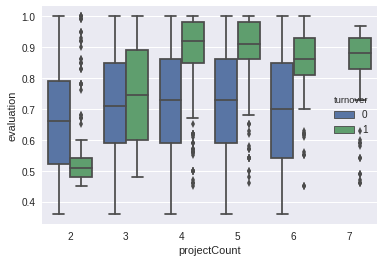

In [25]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

##Satisfaction VS Evaluation

There are 3 distinct clusters for employees who left the company
- Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
- Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
- Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

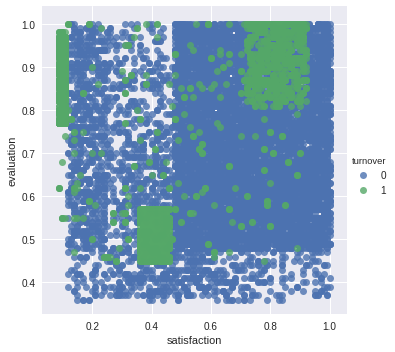

In [6]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

# Feature Importance

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee satisfaction, yearsAtCompany, and evaluation. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

Top 3 Features:

- Satisfaction
- YearsAtCompany
- Evaluation

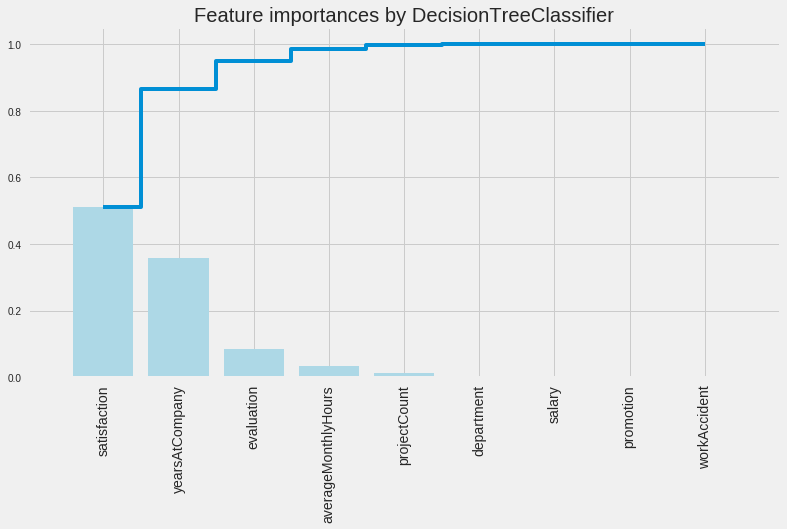

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Modeling the Data: Logistic Regression Analysis

Logistic Regression commonly deals with the issue of how likely an observation is to belong to each group. This model is commonly used to predict the likelihood of an event occurring. In contrast to linear regression, the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. This is a useful model to take advantage of for this problem because we are interested in predicting whether an employee will leave (0) or stay (1).

Another reason for why logistic regression is the preferred model of choice is because of its interpretability. Logistic regression predicts the outcome of the response variable (turnover) through a set of other explanatory variables, also called predictors. In context of this domain, the value of our response variable is categorized into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving the company and the value of 1 (one) represents the probability of an employee leaving the company.

In [28]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
df = pd.DataFrame.from_csv('turnover.csv', index_col=None)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
df = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()
#

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  del sys.path[0]


,satisfaction,evaluation,yearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


# Using Logistic Regression Coefficients

With the elimination of the other variables, I’ll be using the three most important features to create our model: Satisfaction, Evaluation, and YearsAtCompany.

Following overall equation was developed:

Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany*(0.170145) + 0.181896

In [29]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

#answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

## Explanation of Coefficients

Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany*(0.170145) + 0.181896

The values above are the coefficient assigned to each independent variable. The constant 0.181896 represents the effect of all uncontrollable variables.

In [30]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1) / (1+np.exp(y1))
p

0.14431462559738242

## Intepretation of Score

If you were to use these employee values into the equation:

Satisfaction: 0.7
Evaluation: 0.8
YearsAtCompany: 3
You would get:

Employee Turnover Score = (0.7)(-3.769022) + (0.8)(0.207596) + (3)(0.170145) + 0.181896 = 0.14431 = 14%

Result: This employee would have a 14% chance of leaving the company. This information can then be used to form our retention plan.

# Retention Plan Using Logistic Regression

With the logistic regression model, we can now use our scores and evaluate the employees through different scoring metrics. Each zone is explain here:

1. Safe Zone (Green) – Employees within this zone are considered safe.
2. Low Risk Zone (Yellow) – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3. Medium Risk Zone (Orange) – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly.
4. High Risk Zone (Red) – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately.
So with our example above, the employee with a 14% turnover score will be in the safe zone.

# Other Models

A Base Rate Model is a simple model or heuristic used as reference point for comparing how well a model is performing. A baseline helps model developers quantify the minimal, expected performance on a particular problem. In this dataset, the majority class that will be predicted will be 0's, which are employees who did not leave the company.


If you recall back to Part 3: Exploring the Data, 24% of the dataset contained 1's (employee who left the company) and the remaining 76% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict every 0's and ignore all the 1's.


Example: The base rate accuracy for this data set, when classifying everything as 0's, would be 76% because 76% of the dataset are labeled as 0's (employees not leaving the company).

### Evaluating the Model

Precision and Recall / Class Imbalance

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down.

In this case, evaluating our model’s algorithm based on accuracy is the wrong thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: False Positive and False Negative errors.


False Positives (Type I Error): You predict that the employee will leave, but do not

False Negatives (Type II Error): You predict that the employee will not leave, but does leave



In this problem, what type of errors do we care about more? False Positives or False Negatives?

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [33]:
# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))



 ---Logistic Model---
Logistic AUC = 0.74
             precision    recall  f1-score   support

          0       0.90      0.76      0.82      1714
          1       0.48      0.73      0.58       536

avg / total       0.80      0.75      0.76      2250



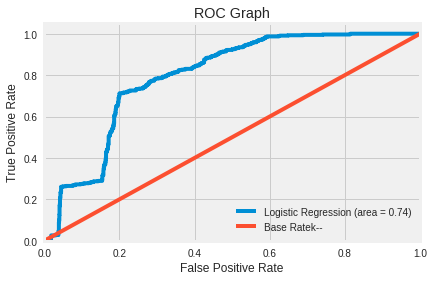

In [35]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Summary


- Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
- Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
- Employees with either really high or low evaluations should be taken into consideration for high turnover rate
- Employees with low to medium salaries are the bulk of employee turnover
- Employees that had 2,6, or 7 project count was at risk of leaving the company
- Employee satisfaction is the highest indicator for employee turnover.
- Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate
- Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

# Solutions:

- We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
- OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.